In [1]:
import random

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 100
n_epochs = 15

In [11]:
mnist_train = datasets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
dloader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
model = nn.Linear(28 ** 2, 10, bias=True).to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-1)

for epoch in range(1, n_epochs + 1):
    loss_sum = 0
    n_batches = len(dloader)
    for imgs, targets in dloader:
        imgs = imgs.view(-1, 28 ** 2).to(device)
        targets = targets.to(device)
        loss = loss_func(model(imgs), targets)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_sum += loss
    print(f'epoch: {epoch:02d}/{n_epochs}\tloss: {loss_sum / n_batches:.9f}')

epoch: 01/15	loss: 0.536860526
epoch: 02/15	loss: 0.359691709
epoch: 03/15	loss: 0.331287563
epoch: 04/15	loss: 0.316315144
epoch: 05/15	loss: 0.307168365
epoch: 06/15	loss: 0.300265759
epoch: 07/15	loss: 0.295016557
epoch: 08/15	loss: 0.290533364
epoch: 09/15	loss: 0.287404209
epoch: 10/15	loss: 0.284438968
epoch: 11/15	loss: 0.281961352
epoch: 12/15	loss: 0.279761404
epoch: 13/15	loss: 0.277641773
epoch: 14/15	loss: 0.275888354
epoch: 15/15	loss: 0.274427325


accuracy: 88.57%


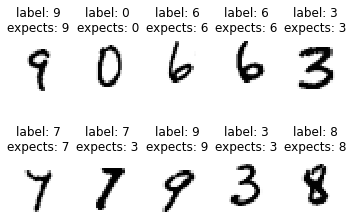

In [12]:
with torch.no_grad():
    imgs = mnist_test.data.view(-1, 28 ** 2).float().to(device)
    targets = mnist_test.targets.to(device)
    is_correct = torch.argmax(model(imgs), dim=1) == targets
    print(f'accuracy: {is_correct.float().mean().item() * 100:.2f}%')

    for idx in range(1, 11):
        i = random.randint(0, len(mnist_test) - 1)
        img = mnist_test.data[i].view(-1, 28 ** 2).float().to(device)
        target = mnist_test.targets[i].to(device)
        
        plt.subplot(2, 5, idx)
        plt.title(f'label: {target.item()}\nexpects: {torch.argmax(model(img), dim=1).item()}')
        plt.axis('off')
        plt.imshow(mnist_test.data[i], cmap='Greys', interpolation='nearest')

[Reference](https://wikidocs.net/60324)